# Shear,Rotation,shift,Zoom 

In [3]:
train_dir=r"C:\Users\sidre\Desktop\cats_and_dogs_small\train"
valid_dir=r"C:\Users\sidre\Desktop\cats_and_dogs_small\validation"
test_dir=r"C:\Users\sidre\Desktop\cats_and_dogs_small\test"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

### We have different images with different specifics: portrait,landscape,different dimensions
## ImageDateGenerator will reshape all of them and bring them to same dimension 

In [4]:
### Generating batches of tensor image data
train_datagen=ImageDataGenerator(rescale=1/255.,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,
                                zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255.)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(valid_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3))) ## 32 filters with 3x3 window with 3 channels
model.add(layers.MaxPooling2D((2,2))) ## 2x2 max pooling layer

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # To avoid over-fitting 
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=["accuracy"])


In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [11]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=20,
                            validation_data=validation_generator,validation_steps=50) 
# we can increase the epochs till 100 in this case

Epoch 1/20
100/100 [==============================] - 178s 2s/step - loss: 0.6816 - accuracy: 0.5707 - val_loss: 0.6607 - val_accuracy: 0.5952
Epoch 2/20
100/100 [==============================] - 185s 2s/step - loss: 0.6605 - accuracy: 0.6099 - val_loss: 0.6424 - val_accuracy: 0.6180
Epoch 3/20
100/100 [==============================] - 154s 2s/step - loss: 0.6435 - accuracy: 0.6269 - val_loss: 0.6295 - val_accuracy: 0.6345
Epoch 4/20
100/100 [==============================] - 159s 2s/step - loss: 0.6323 - accuracy: 0.6443 - val_loss: 0.7076 - val_accuracy: 0.5730
Epoch 5/20
100/100 [==============================] - 160s 2s/step - loss: 0.6221 - accuracy: 0.6495 - val_loss: 0.5924 - val_accuracy: 0.6694
Epoch 6/20
100/100 [==============================] - 162s 2s/step - loss: 0.6069 - accuracy: 0.6645 - val_loss: 0.5820 - val_accuracy: 0.6840
Epoch 7/20
100/100 [==============================] - 165s 2s/step - loss: 0.5894 - accuracy: 0.6784 - val_loss: 0.6454 - val_accuracy: 0.6390

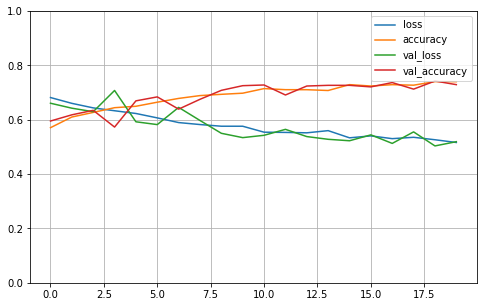

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [13]:
model.save("cat_dog_classifier_data_augmented.h5")

## model evaluation 

In [15]:
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [26]:
model.evaluate_generator(test_generator,steps=50)

[0.5449160486459732, 0.7208122]

In [23]:
from tensorflow import keras
del model
keras.backend.clear_session()

In [25]:
from tensorflow import keras

model=keras.models.load_model("cat_dog_classifier_data_augmented.h5")

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      